In [1]:
!pip install pandas matplotlib seaborn numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
#Basic Information of the dataset
print(f"Total Employees: {df.shape[0]}")
print(f"Attrition Rate: {df['Attrition'].value_counts(normalize=True)['Yes']:.2%}\n")

Total Employees: 1470
Attrition Rate: 16.12%



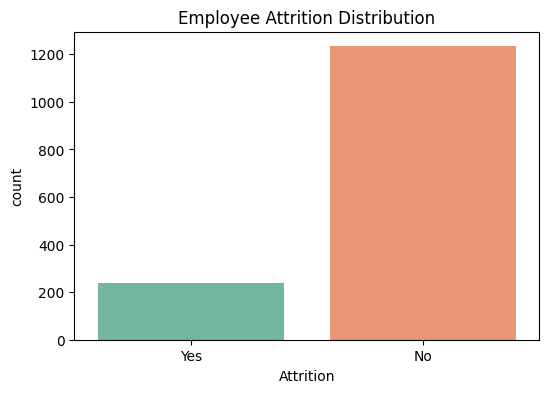

In [6]:
#Univariant Analysis 




plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df, palette='Set2', hue='Attrition', legend=False)
plt.title('Employee Attrition Distribution')
plt.show()


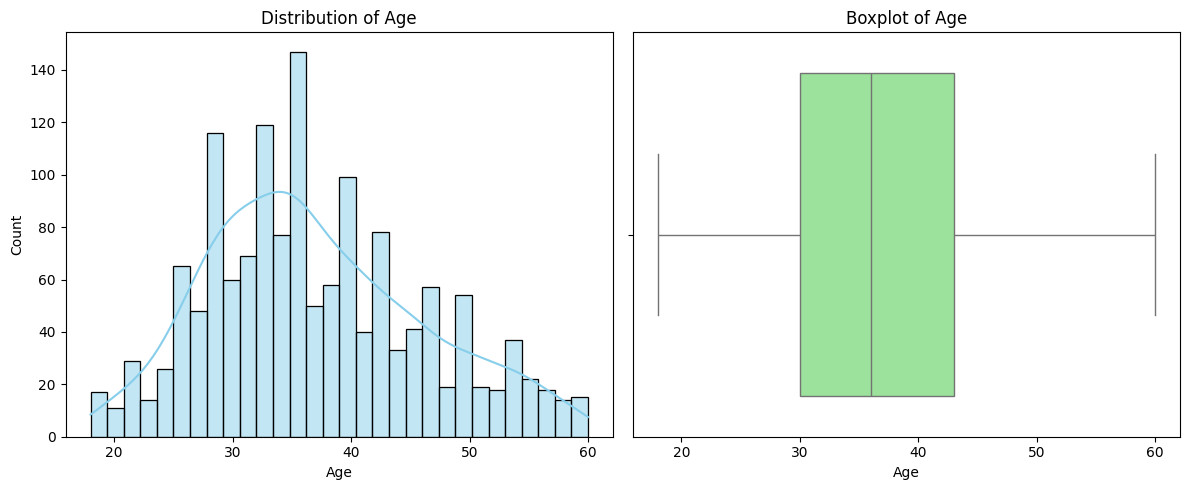

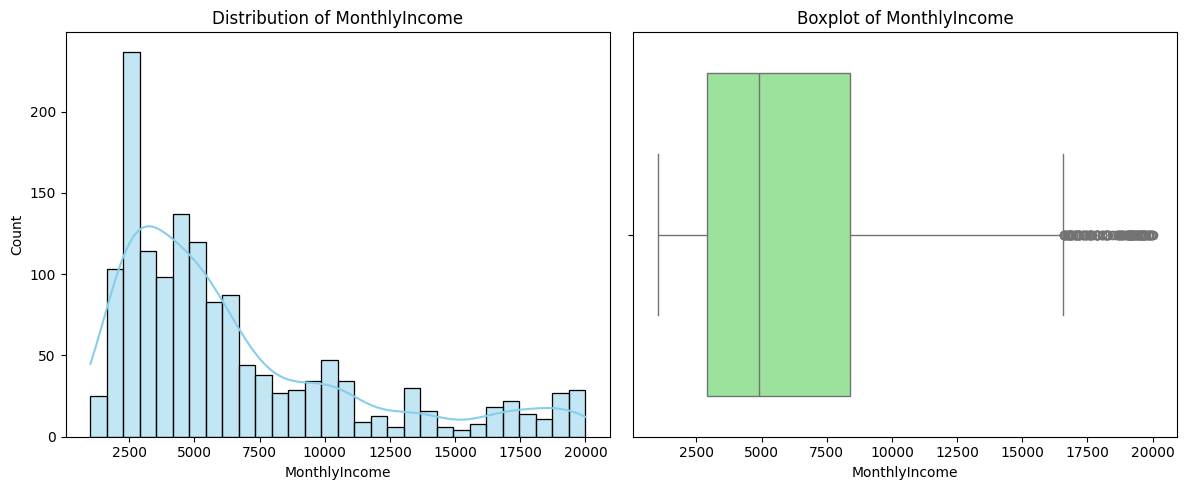

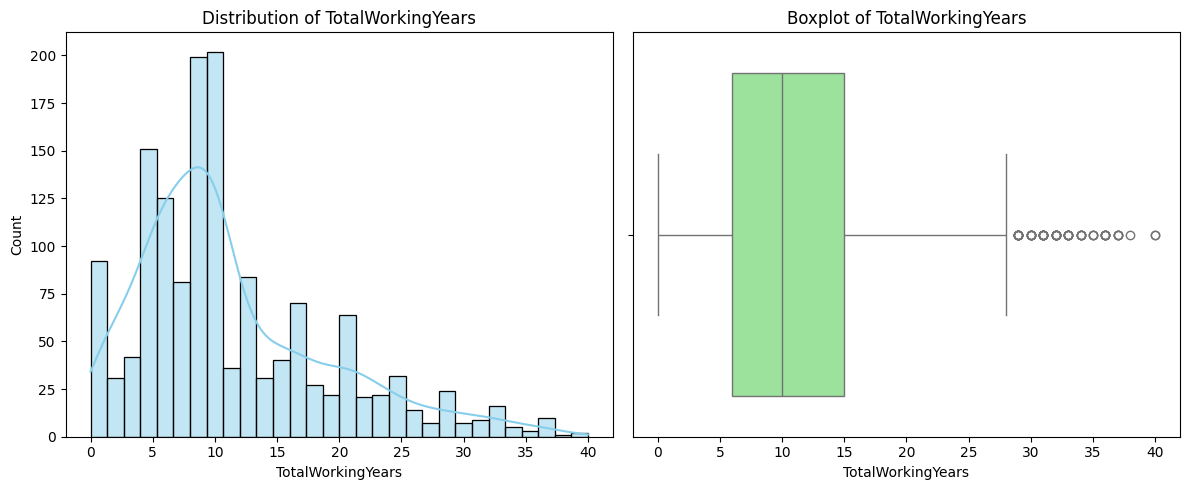

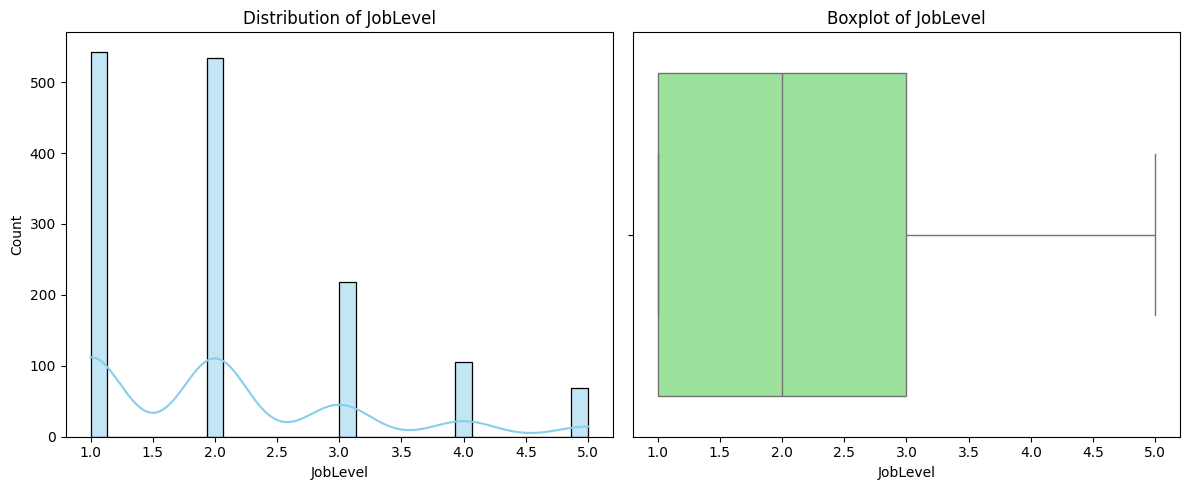

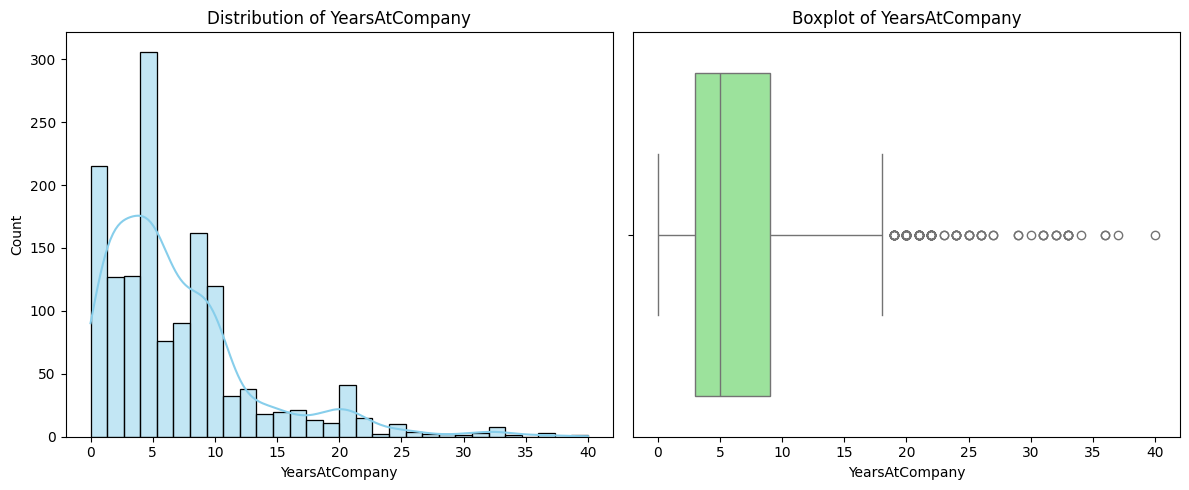

In [7]:
# Histograms and bar graphs for the numeric distriibutions
numeric_features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'JobLevel', 'YearsAtCompany']

for feature in numeric_features:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()

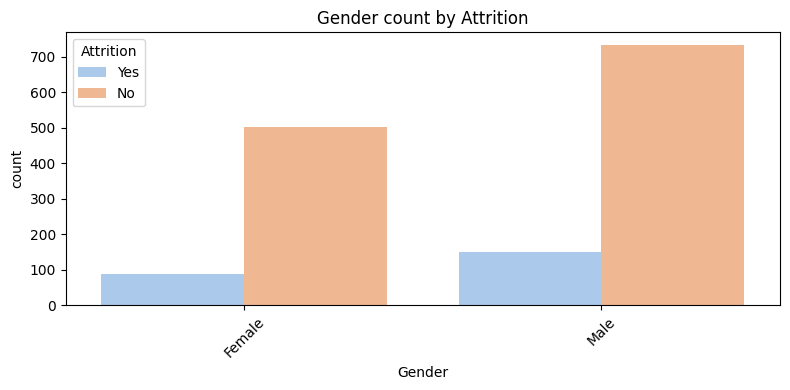

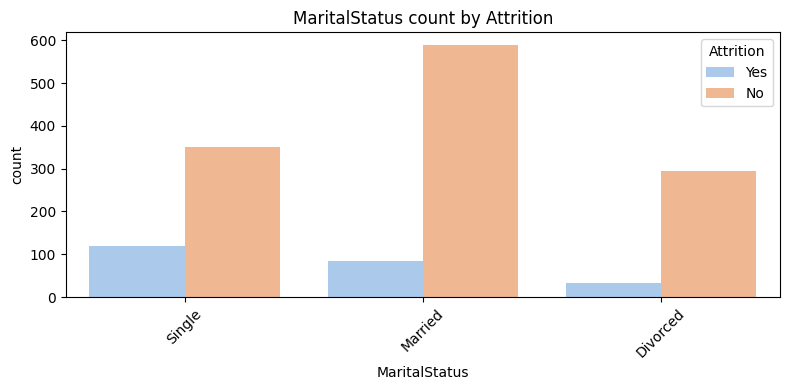

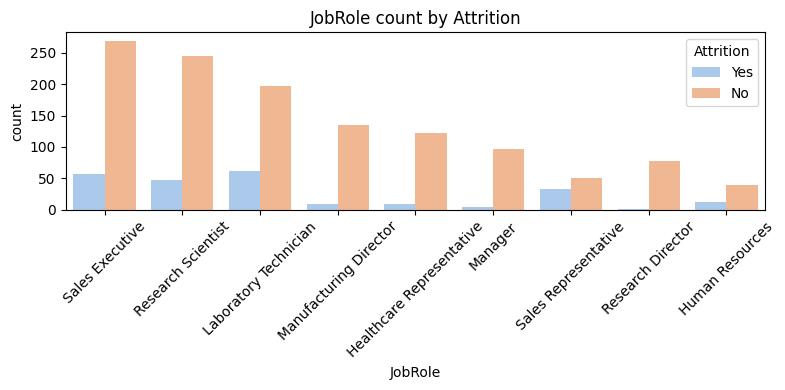

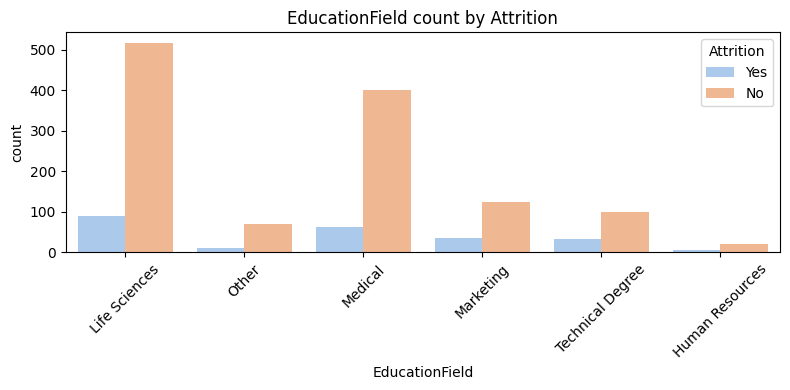

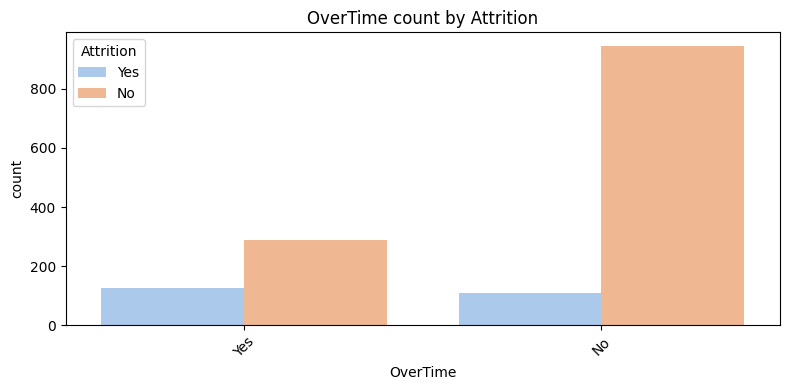

In [9]:
for feature in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, hue='Attrition', data=df, palette='pastel')
    plt.title(f'{feature} count by Attrition')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


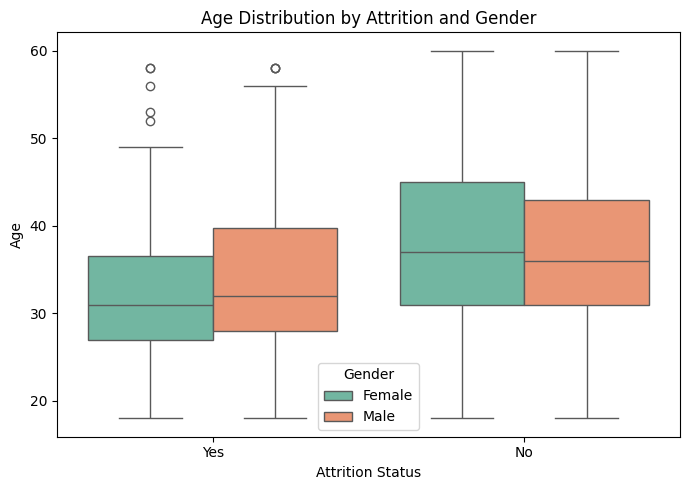

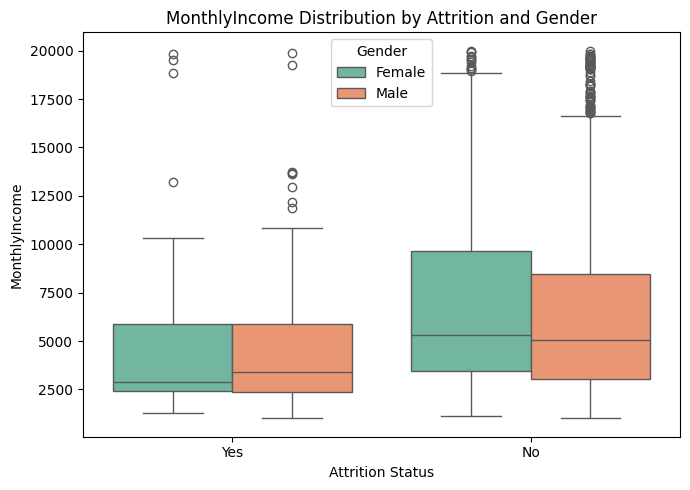

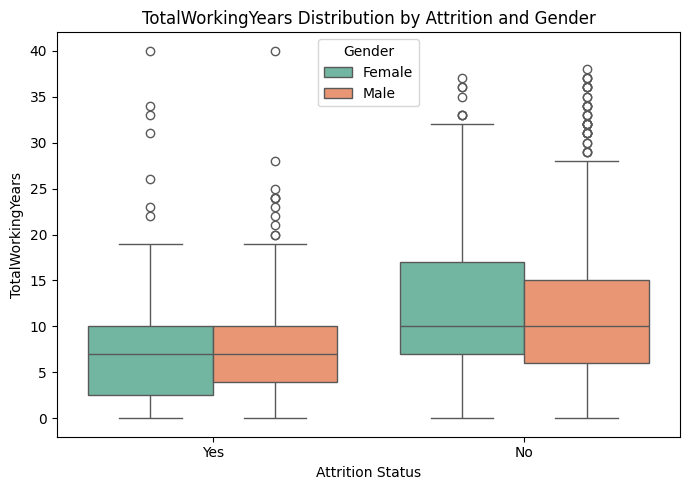

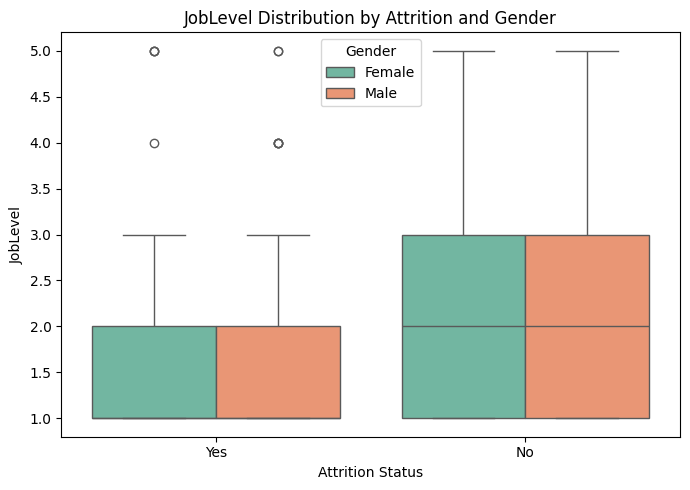

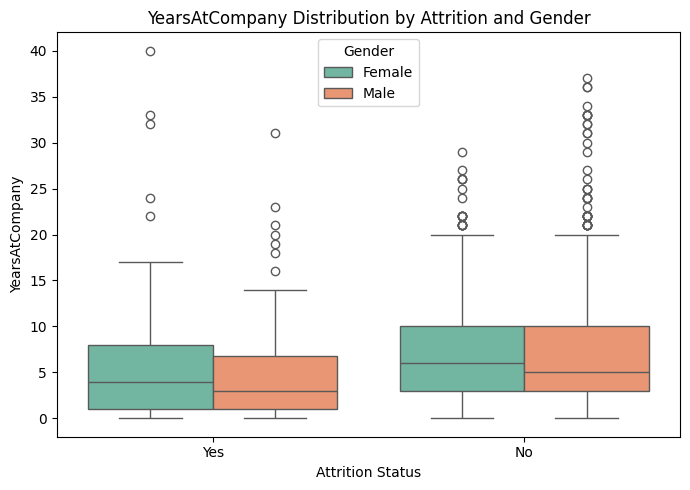

In [16]:
# Bivariate Analysis: Numeric Features vs Attrition by Gender
# This helps understand how numeric features differ between employees who left/stayed, separated by Gender.

for feature in numeric_features:
    plt.figure(figsize=(7,5))
    sns.boxplot(x='Attrition', y=feature, hue='Gender', data=df, palette='Set2')    
    plt.title(f'{feature} Distribution by Attrition and Gender')
    plt.xlabel('Attrition Status')
    plt.ylabel(feature)
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.show()




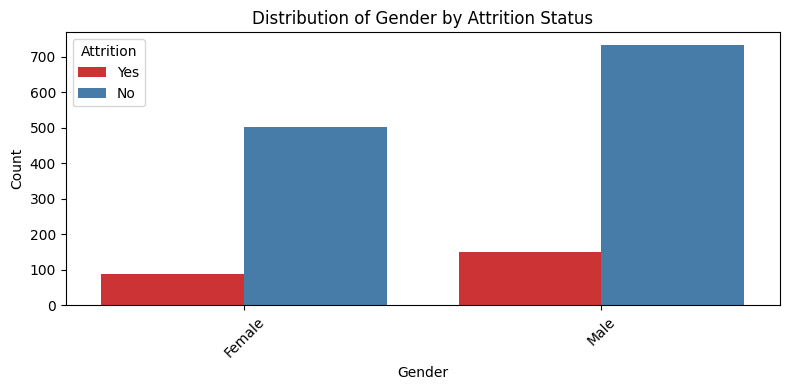

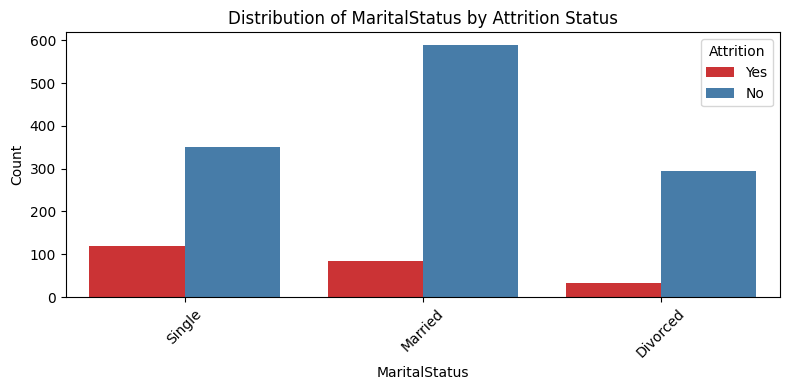

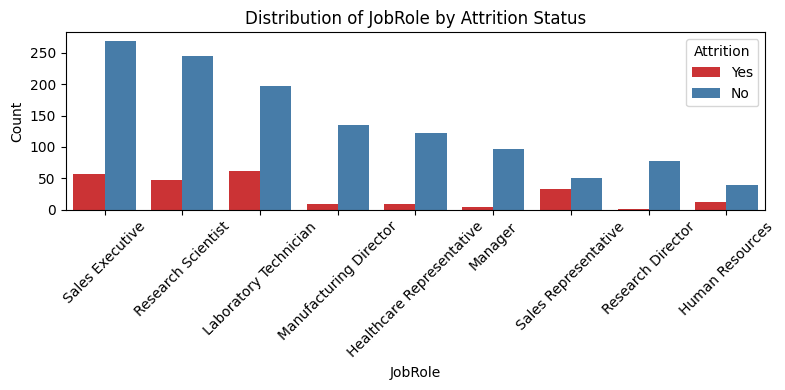

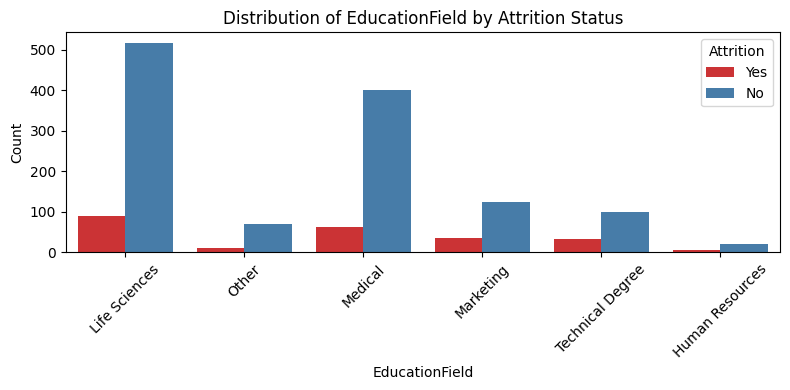

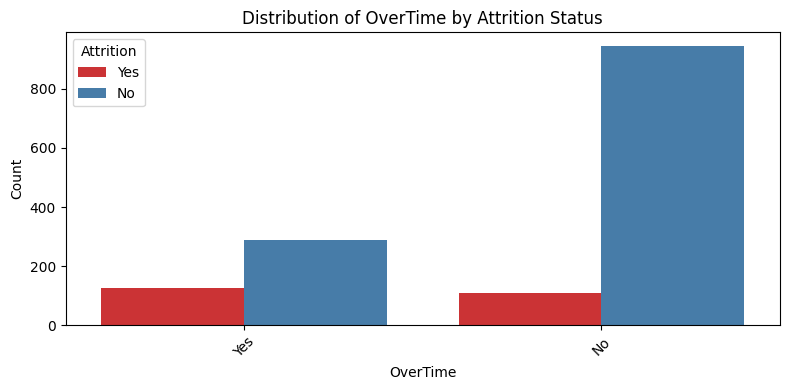

In [17]:
# Categorical features: Countplots showing distribution by Attrition status
for feature in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, hue='Attrition', data=df, palette='Set1')
    plt.title(f'Distribution of {feature} by Attrition Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Attrition')
    plt.tight_layout()
    plt.show()


In [19]:
#Outlier Removal

# Mean Monthly Income by Attrition
mean_left = df[df['Attrition'] == 'Yes']['MonthlyIncome'].mean()
mean_stayed = df[df['Attrition'] == 'No']['MonthlyIncome'].mean()
print(f"Mean Monthly Income of employees who left: ${mean_left:,.2f}")
print(f"Mean Monthly Income of employees who stayed: ${mean_stayed:,.2f}\n")

Mean Monthly Income of employees who left: $4,787.09
Mean Monthly Income of employees who stayed: $6,832.74



MonthlyIncome outliers detected: 114


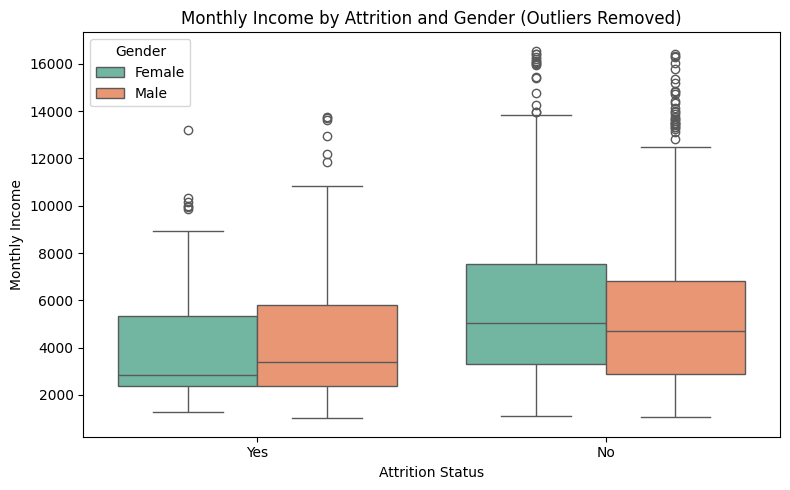

In [21]:
# Detect and remove outliers in MonthlyIncome using IQR method
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = df[(df['MonthlyIncome'] < lower_bound) | (df['MonthlyIncome'] > upper_bound)].shape[0]
print(f"MonthlyIncome outliers detected: {outliers_count}")

# Remove outliers for clearer salary insights
df_clean = df[(df['MonthlyIncome'] >= lower_bound) & (df['MonthlyIncome'] <= upper_bound)]

# Boxplot with Attrition on x-axis and MonthlyIncome on y-axis, grouped by Gender
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', hue='Gender', data=df_clean, palette='Set2')
plt.title('Monthly Income by Attrition and Gender (Outliers Removed)')
plt.xlabel('Attrition Status')
plt.ylabel('Monthly Income')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()




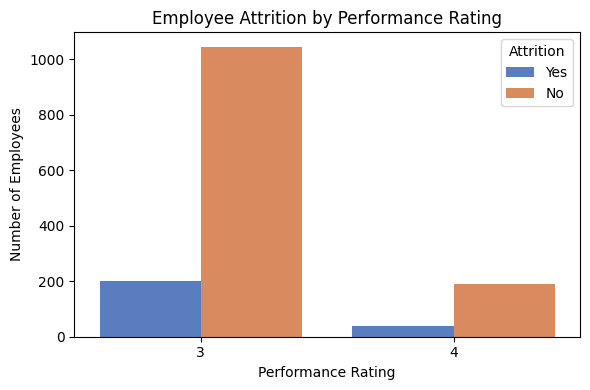

Attrition rate by Performance Rating:
PerformanceRating
3    0.160772
4    0.163717
Name: Yes, dtype: float64


In [23]:
# Performance Rating distribution by Attrition status
plt.figure(figsize=(6,4))
sns.countplot(x='PerformanceRating', hue='Attrition', data=df, palette='muted')
plt.title('Employee Attrition by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

# Display attrition rate within each performance rating group
print("Attrition rate by Performance Rating:")
attrition_rate = df.groupby('PerformanceRating')['Attrition'].value_counts(normalize=True).unstack()['Yes']
print(attrition_rate)



In [24]:
# Summary 

print("\nSummary Insights:")
print(f"- The overall employee attrition rate is approximately {df['Attrition'].value_counts(normalize=True)['Yes']:.2%}.")
print("- Attrition tends to be higher among younger employees and specific job roles.")
print("- Employees who leave generally have lower average monthly incomes compared to those who stay.")
print("- Outliers in salary data can distort analysis; removing them provides clearer insights into compensation trends.")
print("- While most high performers remain with the company, some attrition is still observed among top-rated employees.")



Summary Insights:
- The overall employee attrition rate is approximately 16.12%.
- Attrition tends to be higher among younger employees and specific job roles.
- Employees who leave generally have lower average monthly incomes compared to those who stay.
- Outliers in salary data can distort analysis; removing them provides clearer insights into compensation trends.
- While most high performers remain with the company, some attrition is still observed among top-rated employees.
